GROUP 3 - BYTE ME!
The image for group evidence is in the images folder under the name Practice5_Evidence

In [ ]:
from IPython.display import Image
Image(filename='IMAGES\Practice5_Evidence.jpg')

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


2. Determine the number of rows abd columns in the dataset

In [127]:
#Load the dataset
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
#Display number of rows and columns
print("Number of rows and columns:", df.shape)  

Number of rows and columns: (5268, 13)


3. Display the last 75 rows in the dataset

In [128]:
#Display last 75 rows
df.tail(75)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5193,03/15/2008,08:15,"Nbagu, Nigeria",Trade Wings Aviation Ltd.,NaN,Lagos - Bebi Air Strip,Beechcraft 1900D,5N-JAH,UE-322,3.0,3.0,0.0,The plane crashed while en route. Wreckage was...
5194,04/03/2008,11:00,"Lawa, Suriname",Blue Wing Airlines,NaN,Paramaribo - Lawa,Antonov An-28,PZ-TSO,1AJ007-17,19.0,19.0,0.0,While attempting to land the crew aborted the ...
5195,04/09/2008,23:27,"Bundeena, Australia",Avtex Air Services,NaN,Sydney - Brisbane,Swearingen SA227AC Metroliner III,VH-OZA,AC-600,1.0,1.0,0.0,The pilot of the mail plane reported some mino...
5196,04/11/2008,22:15,"Chrisinau, Moldova",Kata Transportation,NaN,"Chrisinau, Moldova - Antalya, Turkey - Sudan",Antonov An-32,ST-AZL,3009,8.0,8.0,0.0,Just minutes after the take off the plane trie...
5197,04/15/2008,14:30,"Goma, Congo",Hewa Bora Airways,NaN,Goma - Kisangani - Kinshasa,McDonnell Douglas DC-9-51,9Q-CHN,47731,85.0,0.0,47.0,"While attempting to takeoff, the plane failed ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


4. Each column except the first one has some missing data. For each column, name
the most appropriate method for treating the missing data. Justify your choices.

i. Time 
- MCAR 
- Fill with "Unknown" 
- Justification, Randomly missing; does not affect numeric analysis.

ii. Location
-MAR
-Fill with "Unknown"
-Justification, Missingness may depend on availability of reports.

iii. Operator
-MAR
-Fill with "Unknown"
-Justification, Missing mainly in older or private aircraft records

iv. Flight
-MNAR 
-Fill with "N/A"
-Justification, Some flights (military/private) intentionally have no number

v. Route
-MAR
-Fill with "Unknown"
-Missing based on reporting differences.

vi. Type
-MAR
-Fill with "Unknown"
-Imputation keeps data usable without loss of information

vii. Registration
-MNAR
-Fill with "N/A"
-Some aircraft types are unregistered or classified.

viii. cn/ln
-MNAR
-Fill with "N/A"
-Often intentionally left blank in reports.

ix. Abroad
-MAR
-Fill with median
-Values likely related to aircraft type; median reduces outlier effect.

x. Fatalities
-MNAR
-Fill with 0
-Missing values likely mean no fatalities.

xi. Ground
-MNAR
-Fill with 0
-Missingness indicates no ground casualties.

xi. Summary
-MCAR
-Fill with "no summary available"
-Missing at random due to unavailable narrative report.


5. Create a new dataframe from the raw/uncleaned data called‘fatality_locations’ with the following columns: ‘Date’,‘Location’, ‘Aboard’, ‘Fatalities’

In [129]:
# Reload the raw dataset to ensure it's uncleaned
raw_df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")

# Select the specified columns
fatality_locations = raw_df[['Date', 'Location', 'Aboard', 'Fatalities']].copy()

# Display the first few rows to confirm
print("'fatality_locations' dataframe created successfully.\n")
display(fatality_locations.head(10))

# Check basic info about this new dataframe
print("\nShape of fatality_locations:", fatality_locations.shape)
print("\nMissing values per column:")
print(fatality_locations.isnull().sum())

'fatality_locations' dataframe created successfully.



,Date,Location,Aboard,Fatalities
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0
3,09/09/1913,Over the North Sea,20.0,14.0
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0
5,03/05/1915,"Tienen, Belgium",41.0,21.0
6,09/03/1915,"Off Cuxhaven, Germany",19.0,19.0
7,07/28/1916,"Near Jambol, Bulgeria",20.0,20.0
8,09/24/1916,"Billericay, England",22.0,22.0
9,10/01/1916,"Potters Bar, England",19.0,19.0



Shape of fatality_locations: (5268, 4)

Missing values per column:
Date           0
Location      20
Aboard        22
Fatalities    12
dtype: int64


6. Date of highest number of recorded fatalities

In [130]:
max_fatality_row = fatality_locations.loc[fatality_locations['Fatalities'].idxmax()]
print(f"\nHighest fatalities: {max_fatality_row['Fatalities']} on {max_fatality_row['Date']}")


Highest fatalities: 583.0 on 03/27/1977


7. Compare passengers aboard to fatalities

In [131]:
no_fatalities = fatality_locations[fatality_locations['Fatalities'] == 0]
print(f"\nCrashes with no fatalities: {len(no_fatalities)}")


Crashes with no fatalities: 58


In [132]:
# Calculate survival rates
fatality_locations['Survivors'] = fatality_locations['Aboard'] - fatality_locations['Fatalities']
fatality_locations['Survival_Rate'] = (fatality_locations['Survivors'] / fatality_locations['Aboard'] * 100).round(2)

print(f"\nCrashes with survivors: {len(fatality_locations[fatality_locations['Survivors'] > 0])}")



Crashes with survivors: 1732


8. Splitting the 'Location' column into Region and US State/Country

In [133]:
fatality_locations = df[['Date', 'Location', 'Aboard', 'Fatalities']].copy()

location_split = fatality_locations['Location'].str.split(',', n=1, expand=True)
fatality_locations.loc[:, 'Region'] = location_split[0]
fatality_locations.loc[:, 'Country/State'] = location_split[1].str.strip()

# Fill missing Country/State with Region values
fatality_locations['Country/State'] = fatality_locations['Country/State'].fillna(fatality_locations['Region'])
fatality_locations.head()


,Date,Location,Aboard,Fatalities,Region,Country/State
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0,Fort Myer,Virginia
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0,AtlantiCity,New Jersey
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0,Victoria,"British Columbia, Canada"
3,09/09/1913,Over the North Sea,20.0,14.0,Over the North Sea,Over the North Sea
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0,Near Johannisthal,Germany


9. Order the data frame by the number of fatalities from highest to lowest and select the first 100.

In [134]:
top_100 = fatality_locations.sort_values(by='Fatalities',ascending=False).head(100)
top_100.head(10)

,Date,Location,Aboard,Fatalities,Region,Country/State
2963,03/27/1977,"Tenerife, Canary Islands",644.0,583.0,Tenerife,Canary Islands
3568,08/12/1985,"Mt. Osutaka, near Ueno Village, Japan",524.0,520.0,Mt. Osutaka,"near Ueno Village, Japan"
4455,11/12/1996,"Near Charkhidadri, India",349.0,349.0,Near Charkhidadri,India
2726,03/03/1974,"Near Ermenonville, France",346.0,346.0,Near Ermenonville,France
3562,06/23/1985,"AtlantiOcean, 110 miles West of Ireland",329.0,329.0,AtlantiOcean,110 miles West of Ireland
3240,08/19/1980,"Near Riyadh, Saudi Arabia",301.0,301.0,Near Riyadh,Saudi Arabia
3775,07/03/1988,"Over the Persian Gulf, near Bandar Abbas, Iran",290.0,290.0,Over the Persian Gulf,"near Bandar Abbas, Iran"
4916,02/19/2003,"Near Shahdad, Iran",275.0,275.0,Near Shahdad,Iran
3137,05/25/1979,"Chicago O'Hare, Illinois",271.0,271.0,Chicago O'Hare,Illinois
3436,09/01/1983,"Near Sakhalin Island, Russia",269.0,269.0,Near Sakhalin Island,Russia


10. Plot a pie chart

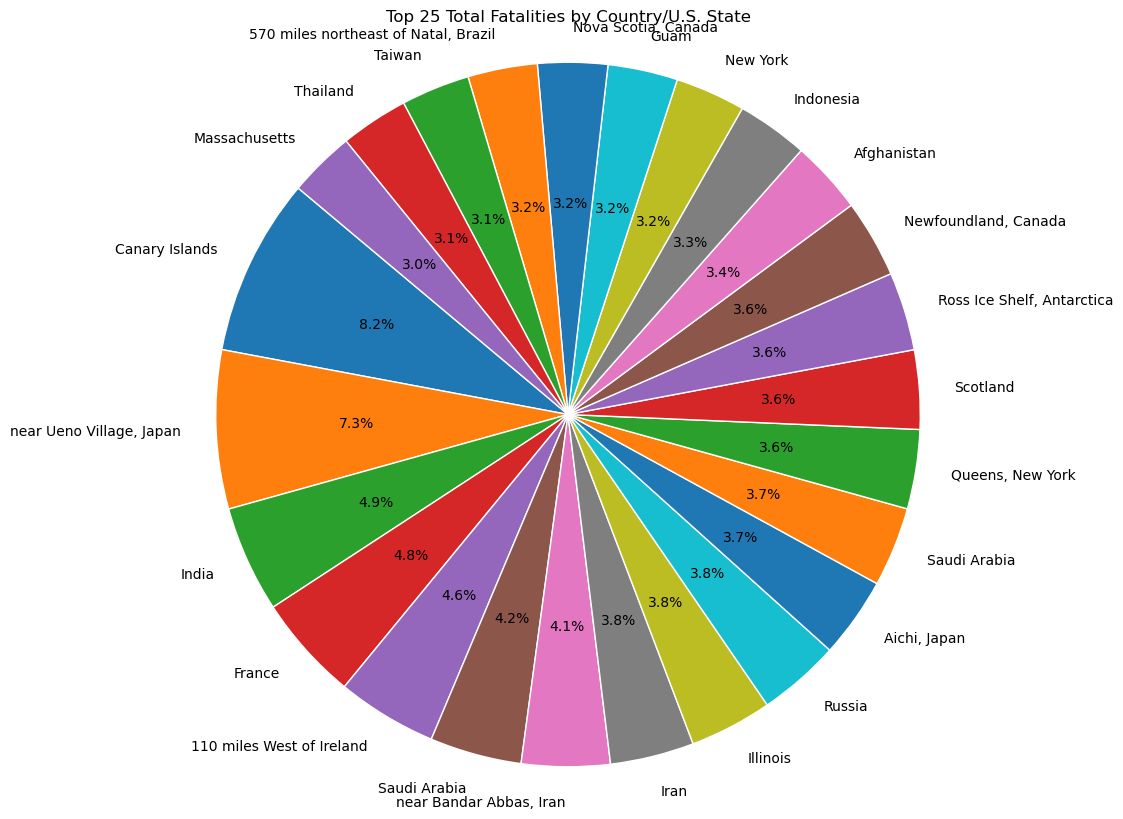

In [135]:
top25 = fatality_locations.set_index('Country/State')['Fatalities'].nlargest(25)

plt.figure(figsize=(10, 10))
plt.pie(
    top25,
    labels=top25.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'w'}
)
plt.title('Top 25 Total Fatalities by Country/U.S. State')
plt.axis('equal')
plt.show()